# Planteamiento del grafo de la red
A continuación se realizó el dibujo del grafo que modela la situación, con lo cual se incluyó un nodo de inicio (fuente) y un nodo de sumidero (destino), que representa la entrada de la instalación y su salida, respectivamente.

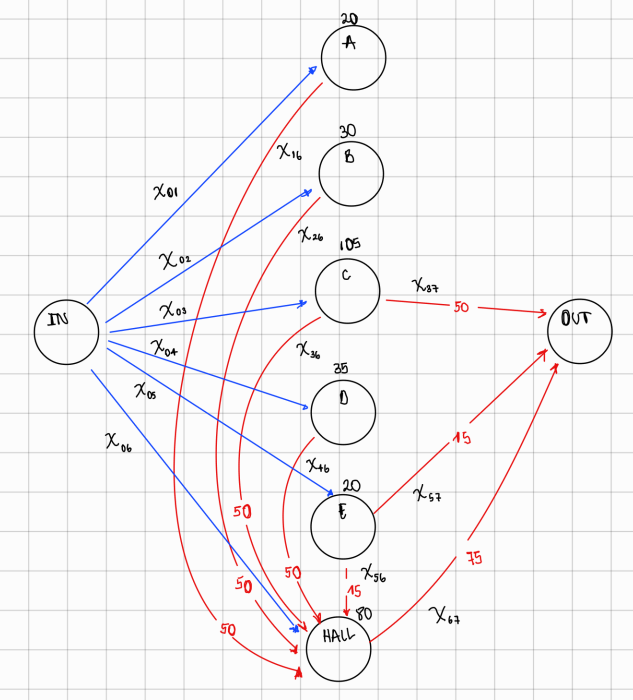


# Planteamiento del problema de optimización
El problema en cuestión es un problema de maximización de flujo.

Las variables de decisión son los flujos por cada corredor. Donde $x_{ij}$ corresponde al flujo entre los nodos $i$ y $j$. Téngase en cuenta que la fuente es representada con subíndice 0 y el sumidero representado con subíndice 7.

$x_{01}$ es el flujo entre la Entrada y el Salón A

$x_{02}$ es el flujo entre la Entrada y el Salón B

$x_{03}$ es el flujo entre la Entrada y el Salón C

$x_{04}$ es el flujo entre la Entrada y el Salón D

$x_{05}$ es el flujo entre la Entrada y el Salón E

$x_{06}$ es el flujo entre la Entrada y el Hall F

$x_{16}$ es el flujo entre el Salón A y el Hall F

$x_{26}$ es el flujo entre el Salón B y el Hall F

$x_{36}$ es el flujo entre el Salón C y el Hall F

$x_{46}$ es el flujo entre el Salón D y el Hall F

$x_{56}$ es el flujo entre el Salón E y el Hall F

$x_{37}$ es el flujo entre el Salón C y la Salida

$x_{57}$ es el flujo entre el Salón E y la Salida

$x_{67}$ es el flujo entre el Hall F y la Salida

$f$ es el flujo neto total de personas que salen de la planta

\
En un problema de flujo se escogen dichas variables de decisión ya que en el problema de optimización requerimos conocer la cantidad de personas que estarán transitando por cada corredor para el caso de una evacuación máxima del edificio teniendo en cuenta las limitaciones de capacidad en los salones y corredores.

La función objetivo es, entonces:

$max$ $f$

sujeto a

$x_{01} + x_{02} + x_{03} + x_{04} + x_{05} + x_{06} - f = 0$

$x_{16} - x_{01} = 0$

$x_{26} - x_{02} = 0$

$x_{36} + x_{37} - x_{03} = 0$

$x_{46} - x_{04} = 0$

$x_{56} + x_{57} - x_{05} = 0$

$x_{67} - x_{16} - x_{26} - x_{36} - x_{46} - x_{56} - x_{06} = 0$

$-x_{37} - x_{57} - x_{67}  + f = 0$

$0 \leq  x_{01} \leq 20$

$0 \leq  x_{02} \leq 30$

$0 \leq  x_{03} \leq 105$

$0 \leq  x_{04} \leq 35$

$0 \leq  x_{05} \leq 20$

$0 \leq  x_{06} \leq 80$

$0 \leq  x_{16} \leq 50$

$0 \leq  x_{26} \leq 50$

$0 \leq  x_{36} \leq 50$

$0 \leq  x_{46} \leq 50$

$0 \leq  x_{56} \leq 15$

$0 \leq  x_{37} \leq 50$

$0 \leq  x_{57} \leq 15$

$0 \leq  x_{67} \leq 75$





# Resolución con Python

In [3]:
from scipy.optimize import linprog

# Coeficientes de la función objetivo (se invierten los signos para maximizar)
c = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]

# Coeficientes de las restricciones (matriz A y vector b)
A = [[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, -1],
     [-1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, -1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, -1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
     [0, 0, 0, -1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
     [0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, 0, 0, 1, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, 1]]
b = [0, 0, 0, 0, 0, 0, 0, 0]

# Límites de las variables (x1, x2)
x0_bounds = (0, 20)
x1_bounds = (0, 30)
x2_bounds = (0, 105)
x3_bounds = (0, 35)
x4_bounds = (0, 20)
x5_bounds = (0, 80)
x6_bounds = (0, 50)
x7_bounds = (0, 50)
x8_bounds = (0, 50)
x9_bounds = (0, 50)
x10_bounds = (0, 15)
x11_bounds = (0, 50)
x12_bounds = (0, 15)
x13_bounds = (0, 75)
x14_bounds = (0, None)



# Opciones para mostrar el informe del proceso de optimización
options = {'disp': True}

# Llamada a la función de optimización lineal con el método de Revised Simplex y opciones de visualización
resultado = linprog(c, A_eq=A, b_eq=b, bounds=[x0_bounds, x1_bounds,x2_bounds, x3_bounds,x4_bounds, x5_bounds,x6_bounds, x7_bounds,x8_bounds,x9_bounds, x10_bounds, x11_bounds, x12_bounds,x13_bounds,x14_bounds], method='revised simplex', options=options)

# Mostrar resultados
print("Valor Máximo de la Función Objetivo:", -resultado.fun)
print("Argumentos Óptimos:", resultado.x)

Phase Iteration Minimum Slack       Constraint Residual Objective          
1     0         NA                  0.0                 0.0                 
1     1         NA                  0.0                 0.0                 
1     2         NA                  0.0                 0.0                 
1     3         NA                  0.0                 0.0                 
1     4         NA                  0.0                 0.0                 
1     5         NA                  0.0                 0.0                 
1     6         NA                  0.0                 0.0                 
2     6         NA                  0.0                 0.0                 
2     7         NA                  0.0                 -20.0               
2     8         NA                  0.0                 -50.0               
2     9         NA                  0.0                 -100.0              
2     10        NA                  0.0                 -125.0              


<ipython-input-3-97622426c2b1>:40: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  resultado = linprog(c, A_eq=A, b_eq=b, bounds=[x0_bounds, x1_bounds,x2_bounds, x3_bounds,x4_bounds, x5_bounds,x6_bounds, x7_bounds,x8_bounds,x9_bounds, x10_bounds, x11_bounds, x12_bounds,x13_bounds,x14_bounds], method='revised simplex', options=options)
<ipython-input-3-97622426c2b1>:40: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  resultado = linprog(c, A_eq=A, b_eq=b, bounds=[x0_bounds, x1_bounds,x2_bounds, x3_bounds,x4_bounds, x5_bounds,x6_bounds, x7_bounds,x8_bounds,x9_bounds, x10_bounds, x11_bounds, x12_bounds,x13_bounds,x14_bounds], method='revised simplex', options=options)


De esta manera, los resultados para cada variable del problema de optimización son:

$x_{01} = 20$

$x_{02} = 30$

$x_{03} = 50$

$x_{04} = 25$

$x_{05} = 15$

$x_{06} = 0$

$x_{16} = 20$

$x_{26} = 30$

$x_{36} = 0$

$x_{46} = 25$

$x_{56} = 0$

$x_{37} = 50$

$x_{57} = 15$

$x_{67} = 75$

$f = 140$

El resultado anterior tiene sentido dado que 140 corresponde a la capacidad agregada máxima que puede fluir por los corredores de salida del edificio, es decir, $x_{37} + x_{57} + x_{67} = 140$.

# Preguntas
a) Si todas las aulas estan en su máxima capacidad y ocurre un incendio se pueden evacuar todos los estudiantes?.

Esto no es posible, principalmente porque los corredores de salida no dan a basto para contener dicha cantidad de estudiantes. Basta con ver que un solo salón tiene una capacidad máxima de 105 estudiantes que es un valor muy cercano a la cantidad máxima de estudiantes que puede salir simultaneamente por la salida, es decir, 140 estudiantes.

b) Si no se puede evacuar todos los estudiantes. Cual solución usted propondía? Ejemplo. Hacer una una puerta de emergencia el salon donde hay mas capacidad de estudiantes.

Además de la solución sugerida, se podría aumentar la capacidad de los corredores de salida ya existentes. Incluso, sería tambien necesario aumentar la capacidad de los corredores entre salones para no hacer limitar el flujo en estos pasillos. En otras palabras, es necesario o aumentar el número de salidas o aumentar la capacidad de los corredores del edificio.